Question 1

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Largest Circle Radius: 42.42640687119285
Largest Circle Center Coordinates: (x: 234.0, y: 0.0)


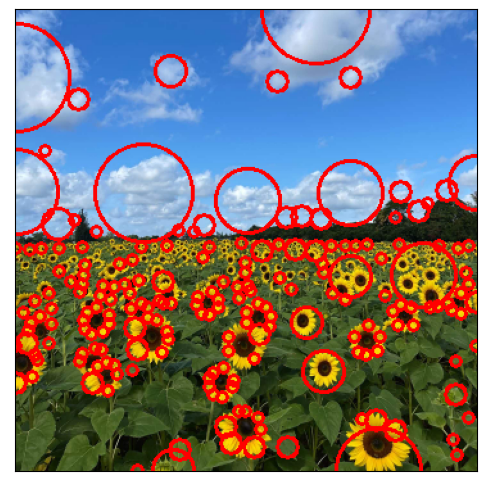

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log
from math import sqrt

# Load the image with the exact path specified in the assignment
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Apply Gaussian blur to reduce noise
blurred = cv.GaussianBlur(im, (9, 9), 0.1)

# Convert the image to grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Define parameters for blob detection
min_sigma = 3
max_sigma = 30
threshold = .1

# Detect blobs using Laplacian of Gaussians
blobs = blob_log(gray, min_sigma=min_sigma, max_sigma=max_sigma, threshold=threshold)
blobs[:, 2] = blobs[:, 2] * sqrt(2)  # Convert radii from sqrt(2) scaling

# Identify the largest circle
max_radius_index = np.argmax(blobs[:, 2])
largest_circle_params = blobs[max_radius_index]
y, x, r = largest_circle_params
print(f"Largest Circle Radius: {r}")
print(f"Largest Circle Center Coordinates: (x: {x}, y: {y})")

# Draw circles on the original image
for blob in blobs:
    y, x, r = blob
    cv.circle(im, (int(x), int(y)), int(r), (0, 0, 255), 2)

# Convert BGR to RGB for displaying in matplotlib
img_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)

# Show the image with circles
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img_rgb)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Question 2

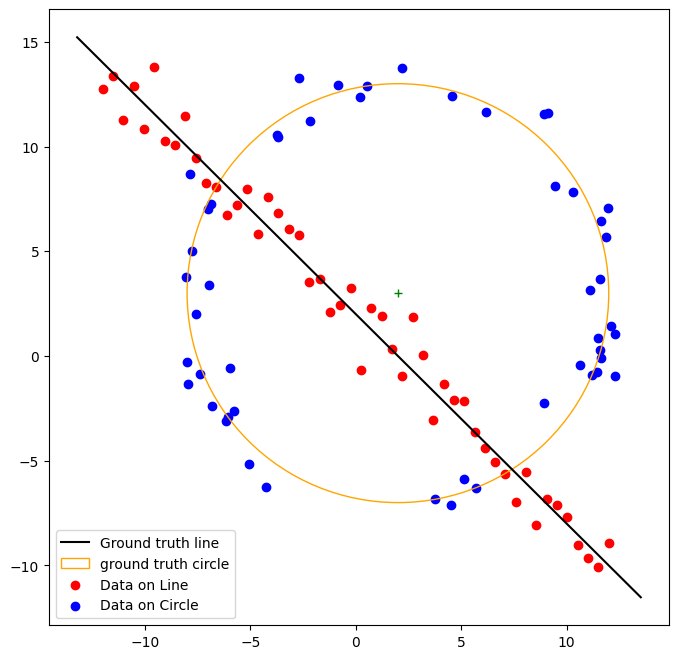

In [23]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import tikzplotlib
import circle_fit as cf
N = 100
half_n = N//2
r = 10
x0_gt,y0_gt=2,3 # Center
s = r/16
t = np.random.uniform(0 , 2*np.pi , half_n )
n = s*np.random.randn(half_n)
x,y=x0_gt +( r + n)*np.cos( t ),y0_gt + ( r + n)*np.sin( t )
X_circ = np.hstack((x.reshape ( half_n , 1 ) , y.reshape( half_n , 1 )))
s = 1.
m,b =-1,2
x =np.linspace(-12, 12 , half_n )
y = m*x + b + s*np.random.randn( half_n )
X_line = np.hstack((x.reshape(half_n, 1 ) , y.reshape( half_n ,1)))
X = np.vstack((X_circ,X_line))

fig,ax =plt.subplots(1,1, figsize=(8,8))
ax.scatter(X_line [:,0],X_line[:,1],label="Data on Line", color="red")
ax.scatter( X_circ[:,0],X_circ[:,1],label="Data on Circle", color="blue")
circle_gt = plt.Circle((x0_gt , y0_gt ) , r , color= "orange" , fill=False , label= "ground truth circle" )
ax.add_patch( circle_gt )
ax.plot((x0_gt ),(y0_gt),"+",color="g")
x_min,x_max = ax.get_xlim( )
x_ = np.array([ x_min , x_max ])
y_ = m*x_ + b
plt.plot( x_ , y_ , color= "black" , label=  "Ground truth line" )
plt.legend ( )


Best line model [0.61484551 0.78864757 2.82536172]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


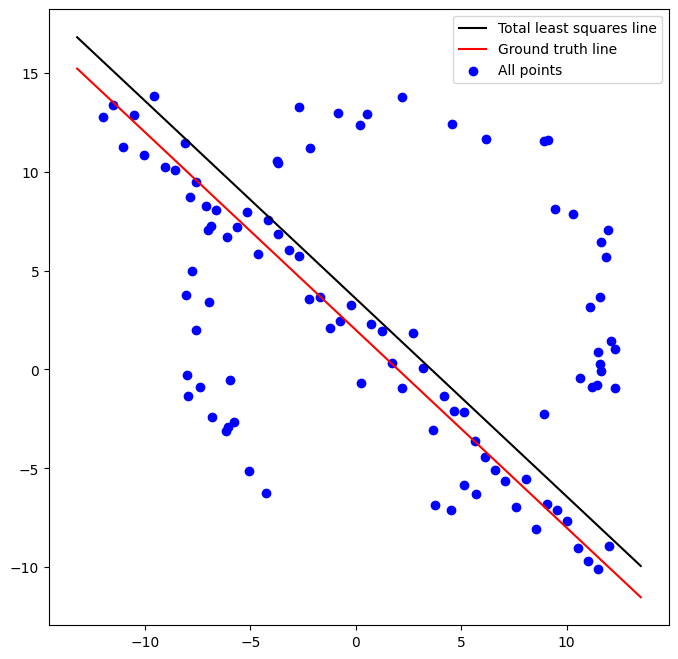

In [24]:
import math
N = X.shape[0]
X_ = X

m,c=-1,2

U = X_ - np.mean(X_, axis=0)

# Eigenvector of 𝑈^𝑇𝑈 associated with the smallest eigenvalue
_, _, Vt = np.linalg.svd(np.transpose(U)@U)
a, b = Vt[-1, 0], Vt[-1, 1]
d = a*np.mean(X_[:,0]) + b*np.mean(X_[:,1])
best_model_line = np.array([a, b, d])

print('Best line model', best_model_line)

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(X[:,0],X[:,1], label='All points', color="blue")
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1]*x_ + best_model_line[2])/best_model_line[1]
plt.plot(x_, y_, label='Total least squares line',c="black")
y_ = m*x_ + c
plt.plot(x_, y_, color= "red" , label=  "Ground truth line")
plt.legend()

Number of inliers: 41
Number of outliers: 59


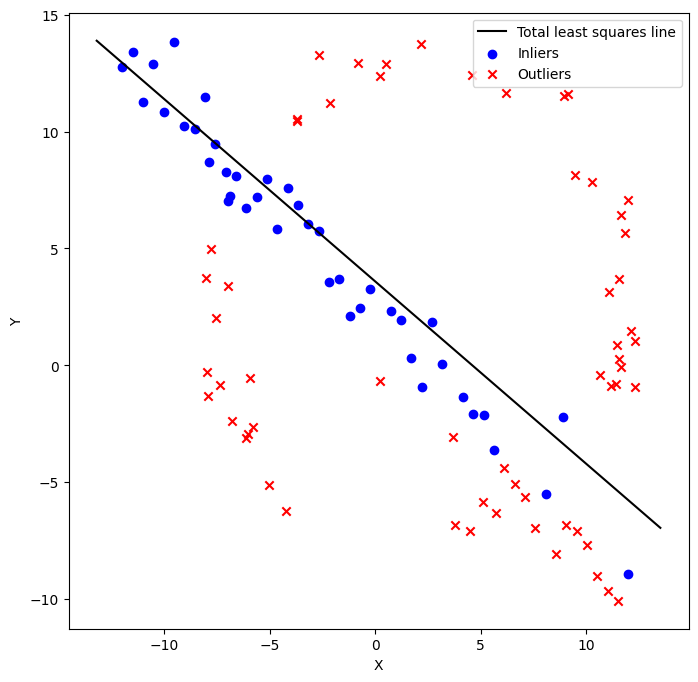

In [33]:
import numpy as np

# Define the line parameters (a, b, d) and distance threshold
a, b, d = best_model_line
distance_threshold = 2.5

# Initialize arrays to store inliers and outliers
inliers = []
outliers = []

# Calculate and classify points as inliers or outliers
for x, y in X:
    distance = abs(a * x + b * y - d) 
    if distance <= distance_threshold:
        inliers.append([x, y])
    else:
        outliers.append([x, y])

# Convert inliers and outliers to NumPy arrays
inliers = np.array(inliers)
outliers = np.array(outliers)

# Print the number of inliers and outliers
print("Number of inliers:", len(inliers))
print("Number of outliers:", len(outliers))

# Optionally, plot the inliers, outliers, and line
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(inliers[:, 0], inliers[:, 1], label='Inliers', c='blue', marker='o')
ax.scatter(outliers[:, 0], outliers[:, 1], label='Outliers', c='red', marker='x')
x_min, x_max = plt.xlim()
x_values = np.array([x_min, x_max])
y_values = (-a * x_values + d) / b
plt.plot(x_values, y_values, label='Total least squares line', c="black")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


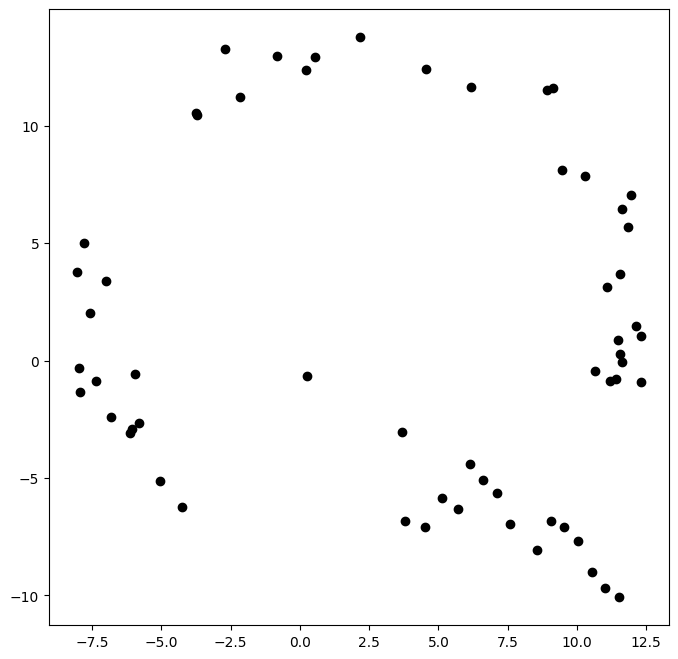

In [34]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(outliers[:,0],outliers[:,1], c='black')

In [35]:
def circ_through_points(x1, x2, x3):
    denominator_1 = ( (x1[0] - x2[0]) * (x2[1] - x3[1]) - (x2[1] - x1[1]) * (x3[0] - x2[0]) )
    denominator_2 = ( (x1[0] - x2[0]) * (x2[1] - x3[1]) - (x2[1] - x1[1]) * (x3[0] - x2[0]) )

    if denominator_1 != 0 and denominator_2 != 0:
        a = 0.5 * ( (x2[1] - x3[1]) * (x1[0]**2 + x1[1]**2 - x2[0]**2 - x2[1]**2) + (x2[1] - x1[1]) * (x2[0]**2 + x2[1]**2 - x3[0]**2 - x3[1]**2) ) / denominator_1
        b = 0.5 * ( (x1[0] - x2[0]) * (x2[0]**2 + x2[1]**2 - x3[0]**2 - x3[1]**2) + (x3[0] - x2[0]) * (x1[0]**2 + x1[1]**2 - x2[0]**2 - x2[1]**2) ) / denominator_2
        c = -x3[0]**2 - x3[1]**2 + 2*a*x3[0] + 2*b*x3[1]

        r = np.sqrt(a**2 + b**2 - c)
    else:
        a,b,r = None, None, None

    return a, b, r

def get_inlier(a, b, r, X, d):
    count = 0
    best_fit_inliers = None

    for i in range(X.shape[0]):
        distance = abs( ( (X[i,0] - a)**2 + (X[i,1] - b)**2 ) ** 0.5 - r )

        if distance < d:
            count += 1

            if type(best_fit_inliers) == type(None):
                best_fit_inliers = np.array([X[i,:]])
            else:
                best_fit_inliers = np.concatenate((best_fit_inliers, X[i,:].reshape(1, -1)), axis=0)
    
    return count, best_fit_inliers    

In [36]:
def RANSAC(X): 
    S = 3
    d = 1.96 #gaussian threshold for selecting a 
    #correct outlier with p1 = 95% probability.
    e = 0.50
    p = 0.99
    N = int(np.ceil(np.log(1-p)/np.log(1-(1-e)**S)))

    best_fit_circle = None
    best_fit_x = None
    best_inlier_count = 0

    for _ in range(N):
        x = []

        for i in range(S):
            hold = X[np.random.randint(0, len(X)), :]
            
            if len(x) == 0:
                x.append(hold)
            elif np.array_equal(hold, x[-1]):                
                while np.array_equal(hold, x[-1]):
                    hold = X[np.random.randint(0, len(X)), :]
                
                x.append(hold)
            else:
                x.append(hold)
        
        a, b, r = circ_through_points(x[0], x[1], x[2])

        if a == None:
            continue

        count, inliers = get_inlier(a, b, r, X, d)

        if count > best_inlier_count:
            best_fit_circle = plt.Circle((a, b), r, color='orange', fill=False, label="Best Sample")
            best_fit_x = x
            best_fit_inliers = inliers
            best_inlier_count = count
    
    if best_inlier_count < e:
        print("The RANSAC algorithm did not find a suitable model")
        return None, None, None, None

    xc,yc,r,_ = cf.least_squares_circle(best_fit_inliers)

    ransac_circle = plt.Circle((xc, yc), r, color='green', fill=False, label="RANSAC")
    
    return ransac_circle, best_fit_circle, best_fit_x, best_fit_inliers 

In [37]:
x=[]
hold = X[np.random.randint(0, len(X)), :]
x.append(hold)
hold = X[np.random.randint(0, len(X)), :]
np.array_equal(hold, x[-1])
hold

array([ 8.08163265, -5.52731267])

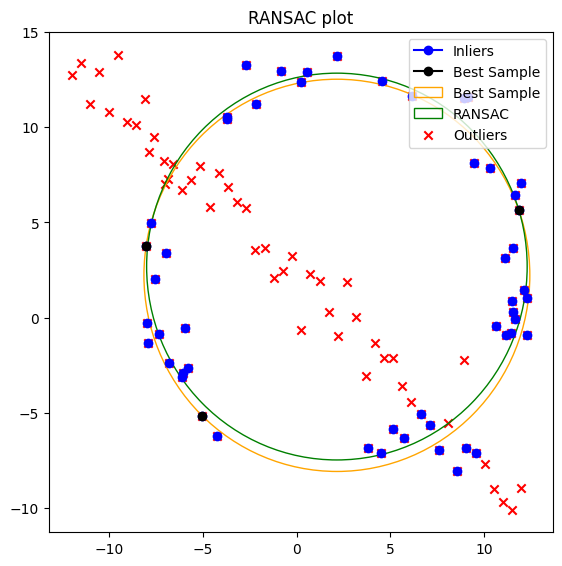

In [38]:
ransac_circle, best_fit_circle, x, inliers = RANSAC(outliers)

if ransac_circle != None:
    fig, ax = plt.subplots(1, 1, figsize=(6.5,6.5))
    ax.scatter(X_circ[:,0], X_circ[:,1], color="red", marker='x')
    ax.scatter(X_line[:,0], X_line[:,1], color="red", marker='x', label="Outliers")

    if type(inliers) != type(None):
        for point in inliers:
            if np.array_equal(point, inliers[-1]):
                ax.plot(point[0], point[1], color="blue", marker='o', label="Inliers")
            else:
                ax.plot(point[0], point[1], color="blue", marker='o')


    for point in x:
        if np.array_equal(point, x[-1]):
            ax.plot(point[0], point[1], color="black", marker='o', label="Best Sample")
        else:
            ax.plot(point[0], point[1], color="black", marker='o')

    ax.add_patch(best_fit_circle)
    ax.add_patch(ransac_circle)
    ax.set_title("RANSAC plot")
    ax.legend(loc="upper right")

Question 3


Processing image galle_fort.jpg...
Displaying galle_fort.jpg. Please select 4 points by clicking on the image.
Point selected: (283, 232)
Point selected: (563, 231)
Point selected: (579, 377)
Point selected: (280, 366)
4 points selected, closing window...
4 points selected: [[283, 232], [563, 231], [579, 377], [280, 366]]
Loading flag image...
Flag image loaded successfully.
Computing homography matrix...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Warping the flag image using the computed homography matrix...
Blending the flag with the original image...
Displaying the final result for galle_fort.jpg...


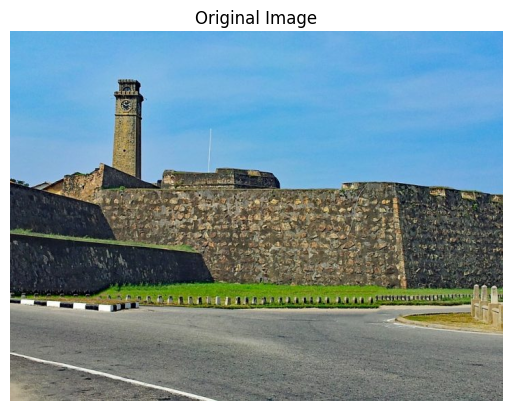

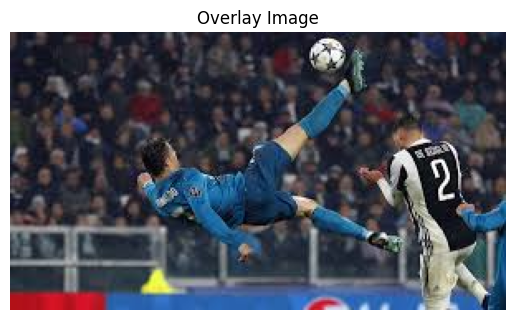

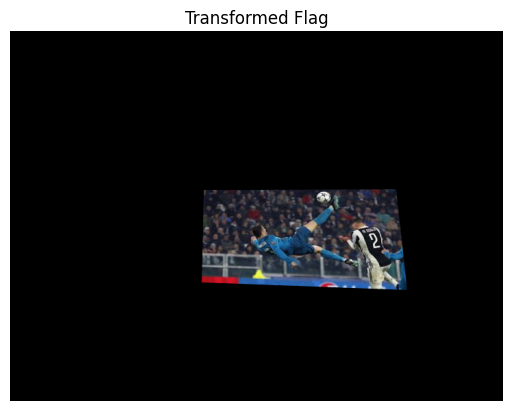

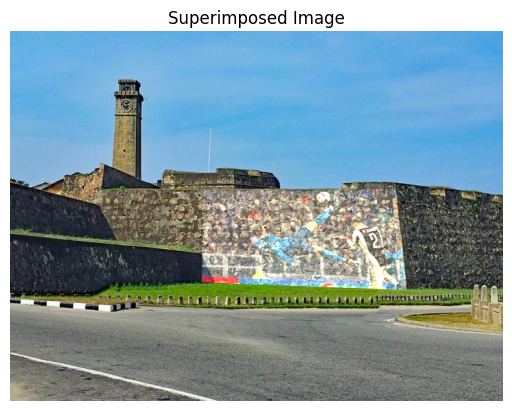


Processing image 005.jpg...
Displaying 005.jpg. Please select 4 points by clicking on the image.
Point selected: (110, 93)
Point selected: (405, 267)
Point selected: (397, 542)
Point selected: (75, 526)
4 points selected, closing window...
4 points selected: [[110, 93], [405, 267], [397, 542], [75, 526]]
Loading flag image...
Flag image loaded successfully.
Computing homography matrix...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Warping the flag image using the computed homography matrix...
Blending the flag with the original image...
Displaying the final result for 005.jpg...


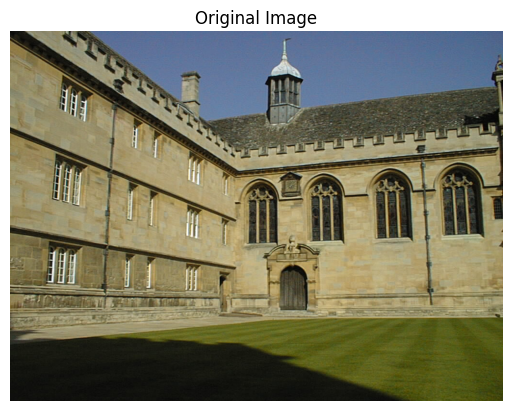

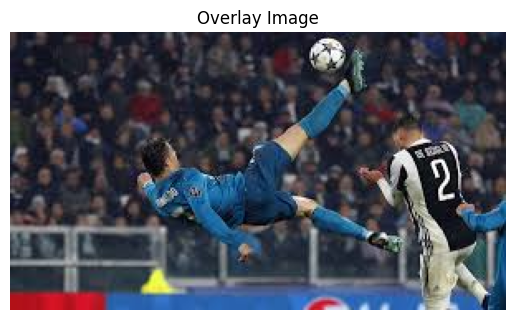

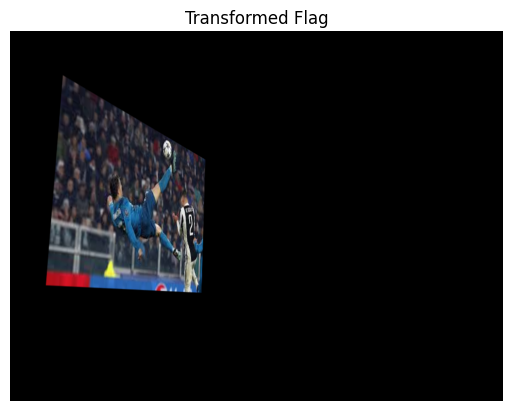

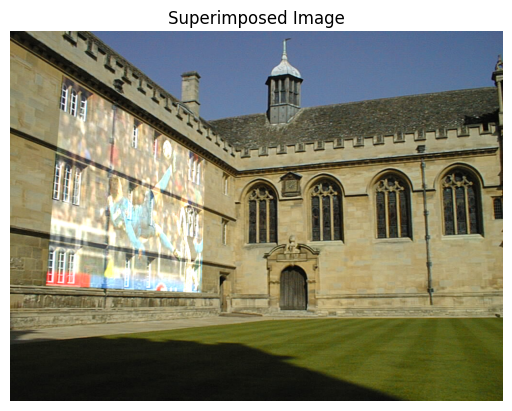

All images processed.


In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# List to store corner points
corners = []

# Mouse click callback function
def mouse_click(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        corners.append([x, y])
        print(f"Point selected: ({x}, {y})")
        if len(corners) == 4:  # If 4 points are selected, destroy the window
            print("4 points selected, closing window...")
            cv.destroyAllWindows()

# Image filenames
ims = ["galle_fort.jpg", "005.jpg"]

for i in range(2):
    print(f"\nProcessing image {ims[i]}...")

    # Load and display the image
    im = cv.imread(ims[i])
    if im is None:
        print(f"Error: Could not load image {ims[i]}.")
        continue
    
    # Show the image and wait for the user to select 4 points
    print(f"Displaying {ims[i]}. Please select 4 points by clicking on the image.")
    cv.imshow("Select 4 Points", im)
    corners = []  # Reset the corners for each image
    cv.setMouseCallback("Select 4 Points", mouse_click)
    cv.waitKey(0)  # Wait until a key is pressed (after selecting 4 points)
    
    # Check if 4 points were selected
    if len(corners) != 4:
        print(f"Error: You must select exactly 4 points for {ims[i]}! Restarting process.")
        continue

    print(f"4 points selected: {corners}")

    # Get dimensions of the image
    h, w = im.shape[:2]
    zero_matrix = np.array([[0], [0], [0]])

    # Get the four points selected
    x1, y1 = corners[0]
    x2, y2 = corners[1]
    x3, y3 = corners[2]
    x4, y4 = corners[3]

    # Load the flag image
    print("Loading flag image...")
    flag_im = cv.imread("cr7b.jpeg")
    if flag_im is None:
        print("Error: Could not load flag image.")
        continue

    print("Flag image loaded successfully.")

    fh, fw, ch = flag_im.shape
    f1 = np.array([[0, 0, 1]])
    f2 = np.array([[fw - 1, 0, 1]])
    f3 = np.array([[fw - 1, fh - 1, 1]])
    f4 = np.array([[0, fh - 1, 1]])

    print("Computing homography matrix...")

    # Create the matrix for homography
    matrix_A = np.concatenate((
        np.concatenate((zero_matrix.T, f1, -y1 * f1), axis=1),
        np.concatenate((f1, zero_matrix.T, -x1 * f1), axis=1),
        np.concatenate((zero_matrix.T, f2, -y2 * f2), axis=1),
        np.concatenate((f2, zero_matrix.T, -x2 * f2), axis=1),
        np.concatenate((zero_matrix.T, f3, -y3 * f3), axis=1),
        np.concatenate((f3, zero_matrix.T, -x3 * f3), axis=1),
        np.concatenate((zero_matrix.T, f4, -y4 * f4), axis=1),
        np.concatenate((f4, zero_matrix.T, -x4 * f4), axis=1)
    ), axis=0, dtype=np.float64)

    W, v = np.linalg.eig(matrix_A.T @ matrix_A)
    temph = v[:, np.argmin(W)]
    H = temph.reshape((3, 3))

    print("Warping the flag image using the computed homography matrix...")
    # Warp the flag image based on the selected points
    transformed_flag = cv.warpPerspective(flag_im, H, (w, h))

    print("Blending the flag with the original image...")
    # Blend the flag with the original image
    final = cv.addWeighted(im, 1, transformed_flag, 1, 0)

    print(f"Displaying the final result for {ims[i]}...")

    # Display each image separately
    plt.figure()
    plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.figure()
    plt.imshow(cv.cvtColor(flag_im, cv.COLOR_BGR2RGB))
    plt.title("Overlay Image")
    plt.axis('off')

    plt.figure()
    plt.imshow(cv.cvtColor(transformed_flag, cv.COLOR_BGR2RGB))
    plt.title("Transformed Flag")
    plt.axis('off')

    plt.figure()
    plt.imshow(cv.cvtColor(final, cv.COLOR_BGR2RGB))
    plt.title("Superimposed Image")
    plt.axis('off')

    plt.show()

print("All images processed.")
